In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


ds = pd.read_csv('./main_property_data.csv')
df = pd.read_csv('./zipcodes.csv')


ds.drop_duplicates(inplace=True)
ds.rename(columns={'Type of property': 'type'}, inplace=True)
ds.rename(columns={'Subtype of property': 'subtype'}, inplace=True)
ds.rename(columns={'Price of property in euro': 'price'}, inplace=True)
ds.rename(columns={'Number of bedrooms': 'bedrooms'}, inplace=True)
ds.drop('Raw num:', inplace=True, axis=1)
ds.drop('Locality', inplace=True, axis=1)
ds.sort_values('price', inplace=True, ascending=False)
ds.drop('type', inplace=True, axis=1)
ds.drop('subtype', inplace=True, axis=1)
ds.drop('Type of Sale', inplace=True, axis=1)
ds.drop('URL', inplace=True, axis=1)
ds.drop('State of the building', inplace=True, axis=1)
ds['Terrace'].fillna(0, inplace=True)
ds['Garden'].fillna(0, inplace=True)
ds['Garden area'].fillna(0, inplace=True)
ds['Kitchen'].fillna(0, inplace=True)
#ds['Type of Sale'].fillna('isUnknown', inplace=True)

df.drop('subcity', inplace=True, axis=1)
df.drop_duplicates(keep='first', inplace=True)
ds1 = ds.sort_values('Zip code')
ds2 = df.sort_values('Zip code')
ds1['Zip code'] = ds1['Zip code'].astype(str)
merged = pd.merge(ds1, ds2, on='Zip code')
merged.to_csv('merged_data.csv', index=False)
df.head()

,Zip code,city,province
0,Post-code,Gemeente,Provincie
1,1000,Brussel,Brussels Hoofdstedelijk Gewest
2,1000,Bruxelles,Brussels Hoofdstedelijk Gewest
3,1030,Schaarbeek,Brussels Hoofdstedelijk Gewest
4,1030,Schaerbeek,Brussels Hoofdstedelijk Gewest


(100000.0, 1000000.0)

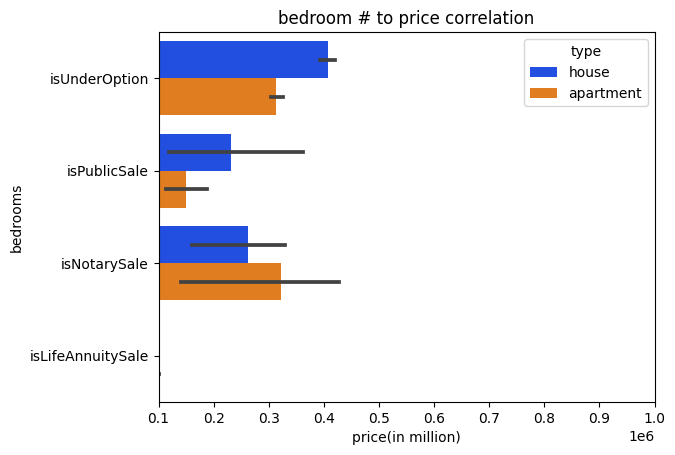

In [182]:
graph = sns.barplot(x='price', y='Type of Sale', data=ds, hue='type', palette='bright')
graph.set(xlabel = 'price(in million)', ylabel = 'bedrooms', title= 'bedroom # to price correlation')
graph.set_xlim(100000, 1000000)

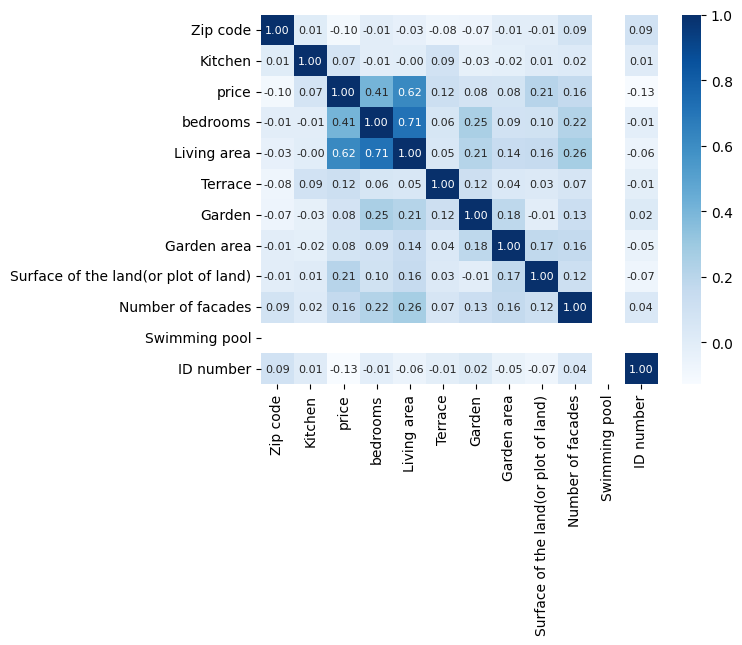

In [13]:

graph_mx = ds.corr(numeric_only=True)
graph = sns.heatmap(graph_mx, annot=True, annot_kws={"size": 8}, fmt='.2f', cmap='Blues')



(0.0, 2000000.0)

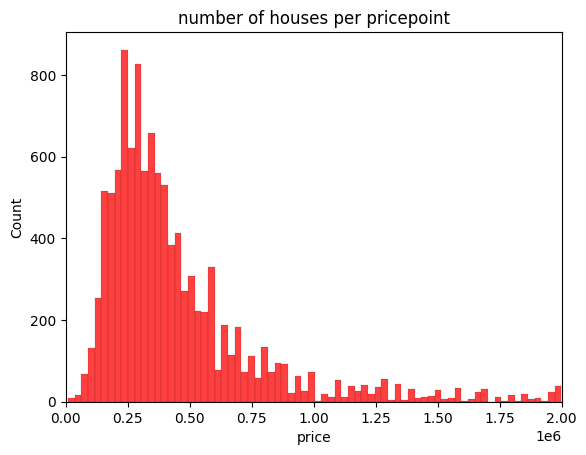

In [18]:
graph = sns.histplot(ds['price'], kde=False, color='red')
graph.set(title='number of houses per pricepoint')
graph.set_xlim(0, 2000000)

[Text(0, 0, 'castle'),
 Text(1, 0, 'manor house'),
 Text(2, 0, 'other property'),
 Text(3, 0, 'exceptional property'),
 Text(4, 0, 'mansion'),
 Text(5, 0, 'villa'),
 Text(6, 0, 'penthouse'),
 Text(7, 0, 'farmhouse'),
 Text(8, 0, 'triplex'),
 Text(9, 0, 'apartment block'),
 Text(10, 0, 'loft'),
 Text(11, 0, 'mixed use building'),
 Text(12, 0, 'country cottage'),
 Text(13, 0, 'town house'),
 Text(14, 0, 'bungalow'),
 Text(15, 0, 'duplex'),
 Text(16, 0, 'house'),
 Text(17, 0, 'ground floor'),
 Text(18, 0, 'apartment'),
 Text(19, 0, 'service flat'),
 Text(20, 0, 'flat studio'),
 Text(21, 0, 'kot'),
 Text(22, 0, 'chalet')]

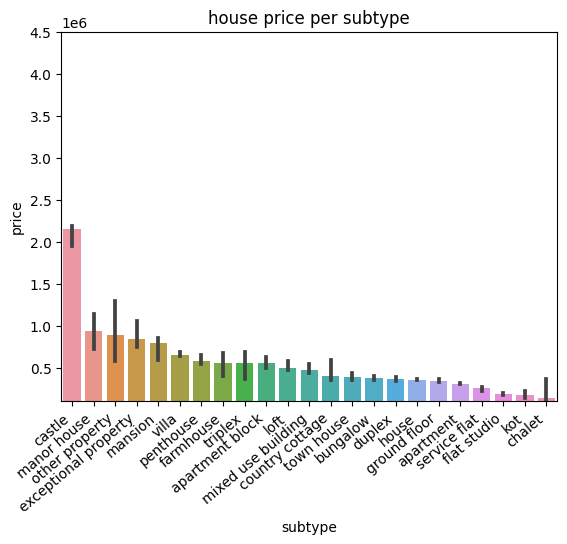

In [21]:
ds = pd.read_csv('main_property_data.csv')

ds.drop_duplicates(inplace=True)
ds.rename(columns={'Type of property': 'type'}, inplace=True)
ds.rename(columns={'Subtype of property': 'subtype'}, inplace=True)
ds.rename(columns={'Price of property in euro': 'price'}, inplace=True)
ds.rename(columns={'Number of bedrooms': 'bedrooms'}, inplace=True)
ds.drop('Raw num:', inplace=True, axis=1)
ds.drop('Locality', inplace=True, axis=1)
ds.sort_values('price', inplace=True, ascending=False)
test = ds.groupby("subtype")["price"].median().sort_values(ascending=False).index
graph = sns.barplot(x='subtype', y='price', data=ds, order=test, estimator='median')
graph.set(title='house price per subtype')
graph.set_ylim(100000, 4500000)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha='right')

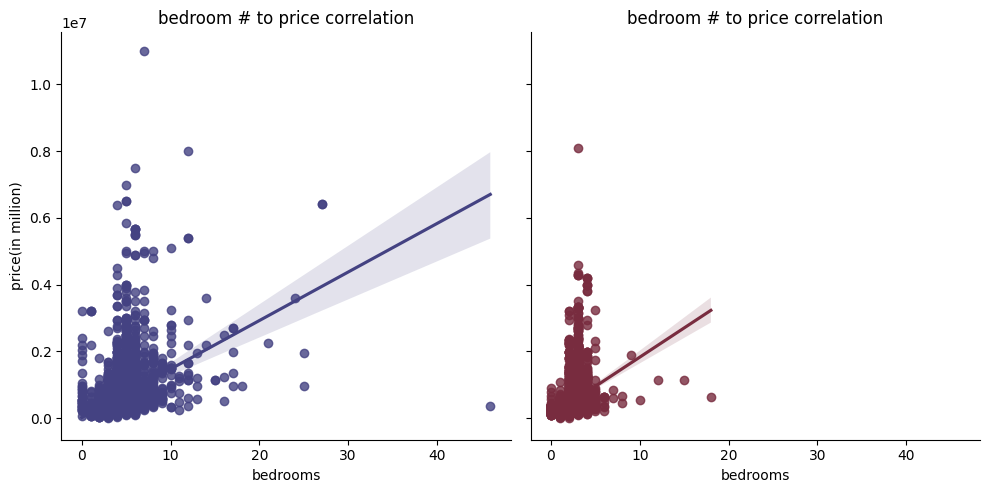

In [31]:
graph = sns.lmplot(x='bedrooms', y='price', data=ds, hue='type', palette='icefire', col='type')
graph.set(xlabel = 'bedrooms', ylabel = 'price(in million)', title= 'bedroom # to price correlation')

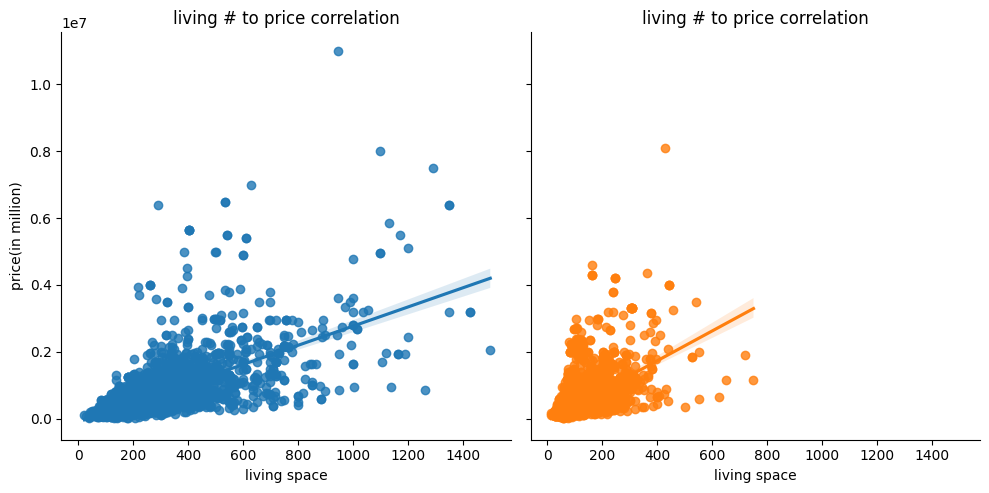

In [29]:
graph = sns.lmplot(x='Living area', y='price', data=ds, col='type', hue='type')
graph.set(xlabel = 'living space', ylabel = 'price(in million)', title= 'living # to price correlation')